### Heart Failure Prediction

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("heart-failure-prediction/heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.duplicated().sum()

0

1    508
0    410
Name: HeartDisease, dtype: int64

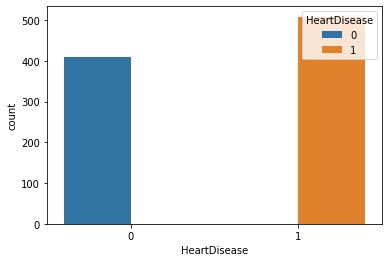

In [5]:
import seaborn as sns
sns.countplot(x="HeartDisease",data=df,hue='HeartDisease') 
df['HeartDisease'].value_counts()

In [6]:
df.select_dtypes(np.object).nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
categ = ['RestingECG','ExerciseAngina','ChestPainType','ST_Slope','Sex']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [8]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

<AxesSubplot:>

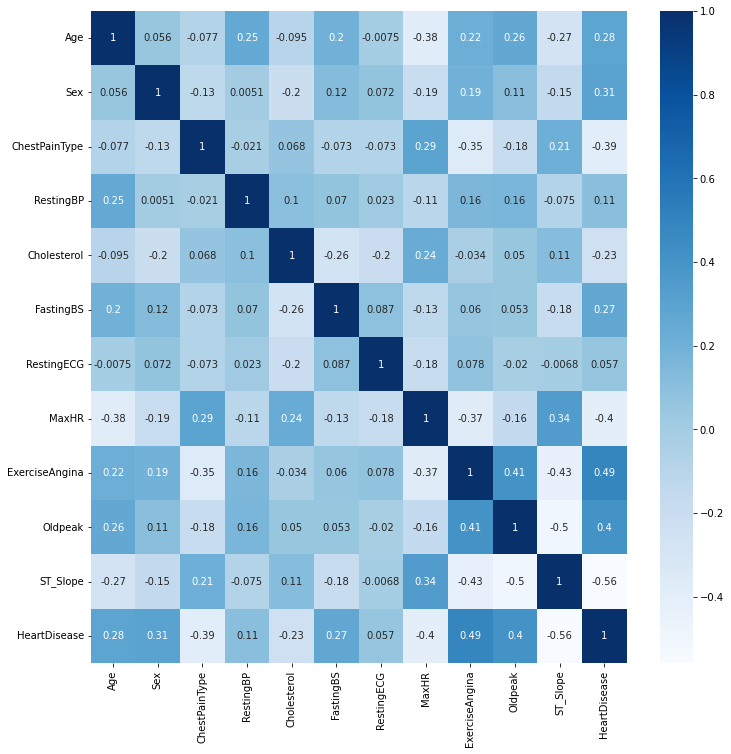

In [9]:
import matplotlib.pyplot as plt
corr=df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr, annot = True, cmap = "Blues")

In [10]:
df.var()

Age                  88.974254
Sex                   0.166220
ChestPainType         0.914929
RestingBP           342.773903
Cholesterol       11964.891079
FastingBS             0.178968
RestingECG            0.399009
MaxHR               648.228614
ExerciseAngina        0.241073
Oldpeak               1.137572
ST_Slope              0.368517
HeartDisease          0.247420
dtype: float64

In [11]:
cov_=df.cov() # covariance
cov_

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,88.974254,0.214397,-0.696086,44.427519,-98.309701,0.790260,-0.044592,-91.750920,0.999410,2.601774,-1.536114,1.323300
Sex,0.214397,0.166220,-0.049355,0.038743,-8.923320,0.020710,0.018427,-1.963786,0.038167,0.045977,-0.037296,0.061943
ChestPainType,-0.696086,-0.049355,0.914929,-0.365650,7.102195,-0.029601,-0.043827,7.041094,-0.166595,-0.180960,0.123983,-0.184047
RestingBP,44.427519,0.038743,-0.365650,342.773903,204.323837,0.549778,0.264957,-52.857808,1.409916,3.254307,-0.844758,0.990808
Cholesterol,-98.309701,-8.923320,7.102195,204.323837,11964.891079,-12.076452,-13.580157,656.671673,-1.834938,5.850572,7.401903,-12.663226
FastingBS,0.790260,0.020710,-0.029601,0.549778,-12.076452,0.178968,0.023262,-1.415709,0.012556,0.023778,-0.045141,0.056246
RestingECG,-0.044592,0.018427,-0.043827,0.264957,-13.580157,0.023262,0.399009,-2.883213,0.024036,-0.013769,-0.002599,0.018030
MaxHR,-91.750920,-1.963786,7.041094,-52.857808,656.671673,-1.415709,-2.883213,648.228614,-4.630617,-4.363589,5.307841,-5.071057
ExerciseAngina,0.999410,0.038167,-0.166595,1.409916,-1.834938,0.012556,0.024036,-4.630617,0.241073,0.214055,-0.127780,0.120717
Oldpeak,2.601774,0.045977,-0.180960,3.254307,5.850572,0.023778,-0.013769,-4.363589,0.214055,1.137572,-0.324978,0.214307


#### Variance Inflation Factor

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,VIF
0,Age,31.334848
1,Sex,5.192227
2,ChestPainType,2.109002
3,RestingBP,47.457298
4,Cholesterol,5.322238
5,FastingBS,1.519112
6,RestingECG,3.535276
7,MaxHR,26.170738
8,ExerciseAngina,2.661858
9,Oldpeak,2.576525


restingBP, Age, and MaxHR have VIF value greater than 10 . so we drop the biggest VIF values then calculate again the VIF

In [13]:
df=df.drop(['RestingBP','Age','MaxHR'],axis=1)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,features,VIF
0,Sex,4.833375
1,ChestPainType,1.873646
2,Cholesterol,4.064188
3,FastingBS,1.453147
4,RestingECG,3.266940
5,ExerciseAngina,2.541231
6,Oldpeak,2.348964
7,ST_Slope,5.601216
8,HeartDisease,3.766806


In [15]:
df.skew()

Sex              -1.424540
ChestPainType     0.793916
Cholesterol      -0.610086
FastingBS         1.264484
RestingECG        0.008492
ExerciseAngina    0.391329
Oldpeak           1.022872
ST_Slope         -0.381382
HeartDisease     -0.215086
dtype: float64

In [16]:
df.kurt()

Sex               0.029372
ChestPainType    -0.717257
Cholesterol       0.118208
FastingBS        -0.401960
RestingECG       -0.487634
ExerciseAngina   -1.850898
Oldpeak           1.203064
ST_Slope         -0.665597
HeartDisease     -1.958008
dtype: float64

In [17]:
y=df['HeartDisease'].values
x=df.drop(['HeartDisease'],axis=1).values


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(x_train, y_train)

SVC(random_state=42)

In [21]:
y_pred = classifier.predict(x_test)

<AxesSubplot:>

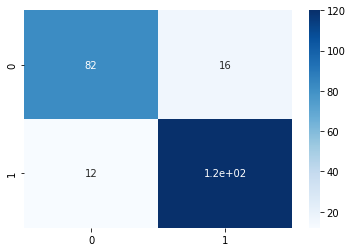

In [22]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True,cmap="Blues")

In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("\n Classification_report: \n",classification_report(y_test,y_pred))


 Classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        98
           1       0.88      0.91      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230



In [24]:
pred = classifier.predict(x)

In [25]:
final_result=pd.DataFrame({'Actual': df.HeartDisease, 'Predicted': pred})
final_result

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
913,1,1
914,1,1
915,1,1
916,1,0
